# PCA 주성분 분석
---
- 전체 특성에서 주요 특성을 압축/융합하는 비지도 학습
- fit() + transform() 2단계 거쳐 주성분 분석

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

## [1] 데이터 준비
---

In [ ]:
X, y = load_iris(as_frame=True, return_X_y=True)

iris = pd.concat((X, pd.DataFrame(y)), axis=1)

In [ ]:
type(X),type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

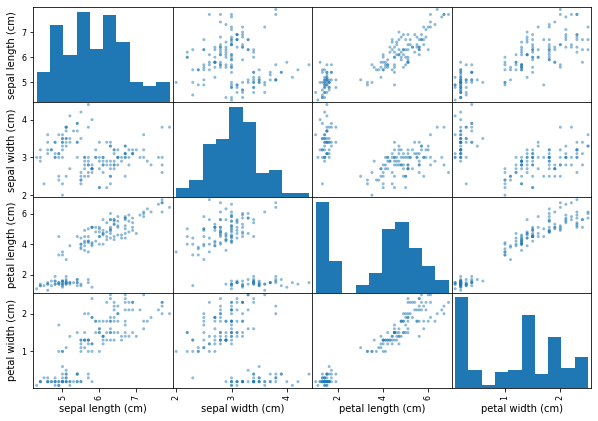

In [ ]:
scatter_matrix(X , figsize=(10, 7))
plt.show()

In [ ]:
target_0 = iris[iris.target == 0]
target_1 = iris[iris.target == 1]
target_2 = iris[iris.target == 2]

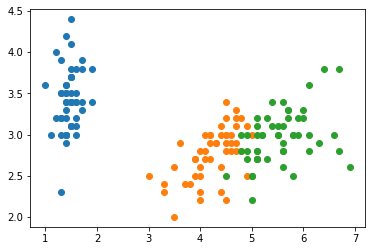

In [ ]:
plt.scatter(target_0["petal length (cm)"], target_0["sepal width (cm)"])
plt.scatter(target_1["petal length (cm)"], target_1["sepal width (cm)"])
plt.scatter(target_2["petal length (cm)"], target_2["sepal width (cm)"])

plt.show()

## [2] 데이터 전처리

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

## [3] PCA 주성분 분석 
---
- iris의 4개 Feature 중에서 주성분 데이터 추출

In [ ]:
pca = PCA()

# 지정된 데이터에서 주성분 추출
pca.fit(X_scaled)

PCA()

In [ ]:
# 주성분 행렬
print("주성분 행렬 : ", pca.singular_values_)

# 주성분에 투영 후 분산 정도 설명
print("분산 정도 : ", pca.explained_variance_)

# 주성분에 투영 후 분산 정도 설명
print("분산 정도 비율 : ", pca.explained_variance_ratio_)

주성분 행렬 :  [20.92306556 11.7091661   4.69185798  1.76273239]
분산 정도 :  [2.93808505 0.9201649  0.14774182 0.02085386]
분산 정도 비율 :  [0.72962445 0.22850762 0.03668922 0.00517871]


## [4] 주성분 갯수 지정
---
- n_components = 0.0 ~ 1.0 : 주성분 투영된 데이터 분산 정도 지정하면 PC갯수 자동 계산
- explained_variance_ratio_ 의 누적값에서 원하는 분포정도 지정해서 PC갯수 계산

### [4-1] explained_variance_ratio_ 사용



In [ ]:
import numpy as np

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum>=0.95)+1

print(f"주성분 갯수(차원) : {d}")

주성분 갯수(차원) : 2


In [ ]:
# 지정된 PC 갯수로 주성분 뎅터 압축
pca2 = PCA(n_components=d)

X_pca2 = pca2.fit_transform(X_scaled)

In [ ]:
X_pca2.shape

(150, 2)

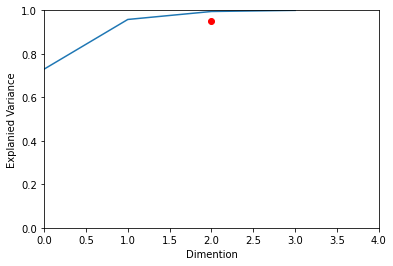

In [ ]:
# 주성분과 데이터 투영 분산 정도 시각화
plt.plot(cumsum)
plt.plot(d, 0.95, "ro")
plt.axis([0,4,0,1])
plt.xlabel("Dimention")
plt.ylabel("Explanied Variance")
plt.show()

### [4-2] n_components=비율값

In [ ]:
pca3 = PCA(n_components=0.95)

X_pca3 = pca3.fit_transform(X_scaled)